In [222]:
# Import more libraries
import numpy as np
import glob
import matplotlib.pyplot as plt
import cv2

In [223]:
# We will be previewing images alongthe way, so lets create a function
def previewImg(text,img_preview,grayscale=False):
    #plt.imshow(img_preview)
    if grayscale==False:
        #convert a color image from BGR to RGB before previewing
        plt.imshow(cv2.cvtColor(img_preview, cv2.COLOR_BGR2RGB))
    else:
        #option for Grayscale images
        plt.imshow(cv2.cvtColor(img_preview, cv2.COLOR_GRAY2RGB))
    plt.title(text)
    plt.show()

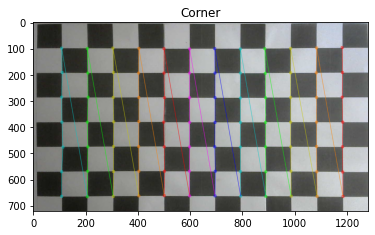

In [224]:
#Tìm corner
boardHeight = 12
boardWidth = 7
# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((boardHeight*boardWidth,3), np.float32)
objp[:,:2] = np.mgrid[0:boardWidth, 0:boardHeight].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
# Make a list of calibration images
images = glob.glob('image4/00.jpg')
# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    chess = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (boardWidth,boardHeight), None)
# If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
# Draw and display the corners
        cv2.drawChessboardCorners(img, (boardWidth,boardHeight), corners, ret)
        

        previewImg('Corner',img)
        
        # cv2.imwrite('image/n_bg_corners.jpg', img)
    else:
        print("Error")


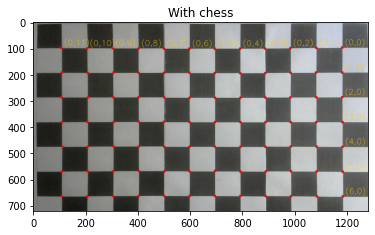

True

In [225]:
#vẽ hệ tọa độ bàn cờ
for i in range (0, boardHeight*boardWidth):
    if (i%7 ==0) or (i< 7):
        text = '(' + str(int(objpoints[0][i][0])) +','+ str(int(objpoints[0][i][1])) + ')'
        image = cv2.putText(chess, text, (int(imgpoints[0][i][0][0]) + 10, int(imgpoints[0][i][0][1])-10), cv2.FONT_HERSHEY_SIMPLEX, 1, 
                 (0, 200, 255), 1, cv2.LINE_AA, False)
    chess_corner  = cv2.circle(chess, (int(imgpoints[0][i][0][0]), int(imgpoints[0][i][0][1])), radius=0, color=(0, 0, 255), thickness=10)

previewImg("With chess", chess_corner)
cv2.imwrite('image4/result_chess.jpg', chess_corner)

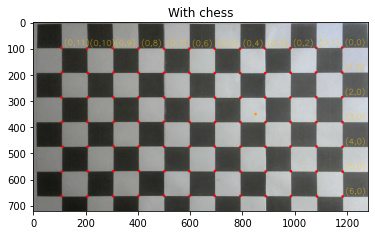

In [226]:
#lấy một điểm bất kỳ để thử nghiệm
test_point = [850, 350]
chess_corner  = cv2.circle(chess, (test_point[0], test_point[1]), radius=0, color=(0, 150, 255), thickness=10)
previewImg("With chess", chess_corner)

In [237]:
#tìm tạo độ đỉnh gần nhất
a = (test_point - np.array(imgpoints))*(test_point - np.array(imgpoints))
x= []
for i in range (0, boardHeight*boardWidth):
    sum = np.sum(a[0][i][0])
    x.append(sum)
nearest_point_index = np.argmin(x)
print(nearest_point_index)


24


In [230]:
#Gán giá trị điểm gần nhất với hệ tọa độ pixel và hệ tọa độ bàn cờ
nearest_point = np.array([imgpoints[0][nearest_point_index][0][0] , imgpoints[0][nearest_point_index][0][1]])
r_nearest_point = np.array([objpoints[0][nearest_point_index][0], objpoints[0][nearest_point_index][1]])
print(nearest_point, r_nearest_point)

[888.16644 381.60678] [3. 3.]


In [238]:
#rato
r = int(imgpoints[0][nearest_point_index+1][0][1]) - int(imgpoints[0][nearest_point_index][0][1]) 
print(r)

94


In [234]:
#tọa độ với bàn cờ được ruy ra 
r_test_point= np.array([0, 0])
x = r_nearest_point[0] - 1/r * (test_point[0] - nearest_point[0] )
y = r_nearest_point[1] + 1/r * (test_point[1] - nearest_point[1] )
r_test_point = [round(x, 2) ,round (y,2)]

In [236]:
r_test_point 

[3.41, 2.66]